In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from typing import Literal 

try:
    import importlib
    importlib.reload(vis)
    importlib.reload(partition)
    importlib.reload(density)
    importlib.reload(hierar)
    importlib.reload(generator)
    importlib.reload(fe)
    
    
except NameError: 
    import visuals_tools as vis
    import partitioning_clustering as partition
    import density_clustering as density
    import hierarchical_clustering as hierar
    import ts_generator as generator
    import feature_extraction as fe

In [44]:
crypto_prices = pd.read_csv('data/financial_series/raw_prices/SOL_USD__1d__01_01_2021.csv', sep=',')
crypto_prices.loc[:300, 'close'].to_csv('plotly_exp/SOL_price_300.csv')

#.drop(['Unnamed: 0'], axis=1)
crypto_prices 

,timestamp,open,close,high,low,volume,support,resis
0,2021-01-01 03:00:00,1.5088,1.8600,1.4990,1.8421,4421991.450,NaN,NaN
1,2021-01-02 03:00:00,1.8421,2.0000,1.7116,1.7999,5253819.620,1.86,1.8600
2,2021-01-03 03:00:00,1.7998,2.3800,1.7973,2.1779,8318341.130,1.86,2.0000
3,2021-01-04 03:00:00,2.1789,2.4989,1.8600,2.4909,7800814.800,1.86,2.3800
4,2021-01-05 03:00:00,2.4911,2.5093,2.0621,2.1636,6702006.990,1.86,2.4989
...,...,...,...,...,...,...,...,...
1466,2025-01-06 03:00:00,213.4100,223.1800,211.5600,218.2200,2855362.858,187.87,228.9500
1467,2025-01-07 03:00:00,218.2200,219.1100,201.8000,202.1700,3742298.284,187.87,226.0400
1468,2025-01-08 03:00:00,202.1700,203.2800,188.3400,197.4800,4446830.230,187.87,223.1800
1469,2025-01-09 03:00:00,197.4800,199.0600,182.0000,184.9500,3607147.193,187.87,223.1800


In [11]:
crypto_prices = pd.read_csv('data/financial_series/price_data/close_14.csv', sep=';').drop(['Unnamed: 0'], axis=1)
crypto_prices 

,date,currencies,close,support,resist,ma,b_u,b_l,RSI,RSI_norm,RSI_overbought,RSI_oversold
0,2021-01-15,ADA,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,1
1,2021-01-16,ADA,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,1
2,2021-01-17,ADA,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,1
3,2021-01-18,ADA,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,1
4,2021-01-19,ADA,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
24594,2024-12-27,XRP,0.00002,0.00002,0.00003,0.000021,0.000029,0.000013,50.0,0.5,0,0
24595,2024-12-28,XRP,0.00002,0.00002,0.00003,0.000021,0.000029,0.000013,50.0,0.5,0,0
24596,2024-12-29,XRP,0.00002,0.00002,0.00003,0.000021,0.000029,0.000013,50.0,0.5,0,0
24597,2024-12-30,XRP,0.00002,0.00002,0.00003,0.000021,0.000029,0.000013,50.0,0.5,0,0


e:\GitHubProjects\autolabeling_time_series_data\visuals_tools.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


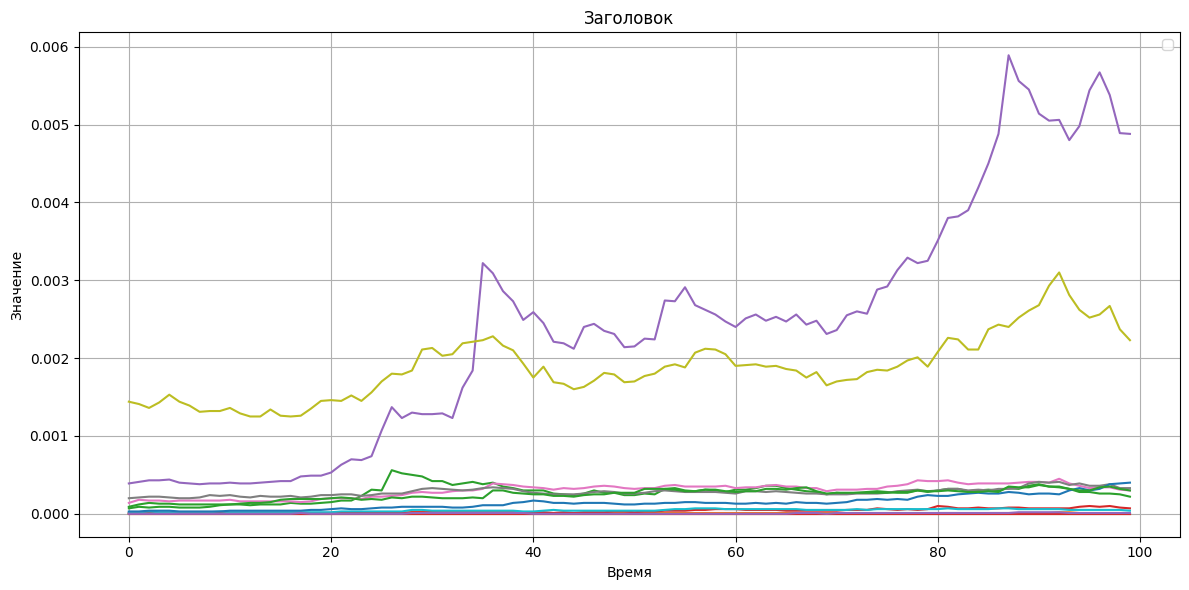

In [26]:
data_raw = [crypto_prices.loc[crypto_prices.currencies==cur, 'close'].values[:100] for cur in np.unique(crypto_prices.currencies) if cur not in ['BTC','ETH']]

vis.multi_plot_one(data_raw)

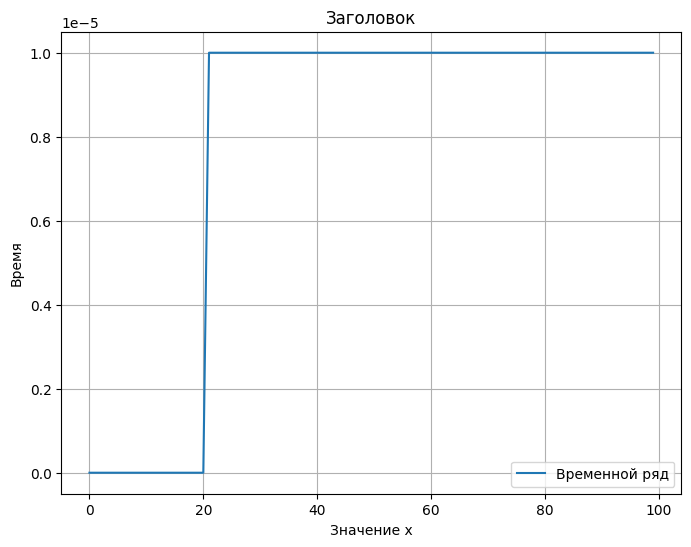

In [ ]:
vis.single_plot(data_raw[0])

In [35]:
pd.Series(data_raw[0]).to_csv('E:/GitHubProjects/autolabeling_time_series_data/exp1.csv')

In [22]:
np.unique(data_raw.currencies)

array(['ADA'], dtype=object)

In [21]:
data_new

[array([1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
        1.e-05, 1.e-05, 1.e-05, 2.e-05, 2.e-05, 2.e-05, 2.e-05, 2.e-05,
        2.e-05, 2.e-05, 2.e-05, 2.e-05, 2.e-05, 2.e-05, 2.e-05, 2.e-05,
        2.e-05, 2.e-05, 2.e-05, 1.e-05, 1.e-05, 1.e-05, 2.e-05, 2.e-05,
        2.e-05, 2.e-05, 1.e-05, 2.e-05, 2.e-05, 2.e-05, 2.e-05, 2.e-05,
        2.e-05, 2.e-05, 2.e-05, 2.e-05, 1.e-05, 2.e-05, 2.e-05, 1.e-05,
        1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
        1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
        1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
        1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
        1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
        1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
        1.e-05, 1.e-05, 1.e-05, 1.e-05])]

In [3]:
# !pip install plotly

  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
!pip install base64  

ERROR: Could not find a version that satisfies the requirement base64 (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for base64
